In [1]:
import pandas as pd 
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn import preprocessing, linear_model, model_selection, metrics

In [3]:
df=pd.read_csv('Flight_processed.csv')

In [4]:
df.head()

,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_target,ArrDelay_target2,IsFriday,Is_Feb_Jun_Dec,carrier_avg_delay,origin_avg_delay,dest_avg_delay
0,1955,2211.0,2225,128.0,-14.0,4.0,8.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0,30.087884,53.531579,35.925260
1,735,1002.0,1000,128.0,2.0,5.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0,30.087884,53.531579,35.925260
2,620,804.0,750,96.0,14.0,3.0,17.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0,30.087884,45.835815,35.889979
3,1755,1959.0,1925,90.0,34.0,3.0,10.0,2.000000,0.000000,0.000000,0.000000,32.000000,1,1,0.0,0,30.087884,45.835815,35.889979
4,1915,2121.0,2110,101.0,11.0,4.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0,30.087884,45.835815,39.358735


In [5]:
round(df.describe(), 2)

,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_target,ArrDelay_target2,IsFriday,Is_Feb_Jun_Dec,carrier_avg_delay,origin_avg_delay,dest_avg_delay
count,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00
mean,1467.72,1610.24,1634.20,133.31,42.20,6.81,18.22,19.18,3.70,15.02,0.09,25.30,0.65,0.44,0.17,0.31,42.20,42.20,42.20
std,424.73,548.00,464.63,72.06,56.78,5.27,14.31,35.02,17.29,27.21,1.63,33.83,0.48,0.50,0.37,0.46,7.66,7.91,8.10
min,0.00,1.00,0.00,14.00,-109.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.26,6.00,6.00
25%,1135.00,1316.00,1325.00,80.00,9.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.45,36.19,35.91
50%,1510.00,1715.00,1705.00,116.00,24.00,6.00,14.00,19.18,0.00,15.02,0.00,25.30,1.00,0.00,0.00,0.00,45.30,40.78,40.12
75%,1815.00,2030.00,2014.00,165.00,56.00,8.00,21.00,19.18,3.70,15.02,0.09,25.30,1.00,1.00,0.00,1.00,47.55,48.28,46.69
max,2359.00,2400.00,2359.00,1114.00,2461.00,240.00,422.00,2436.00,1352.00,1357.00,392.00,1316.00,1.00,1.00,1.00,1.00,55.29,122.56,77.94


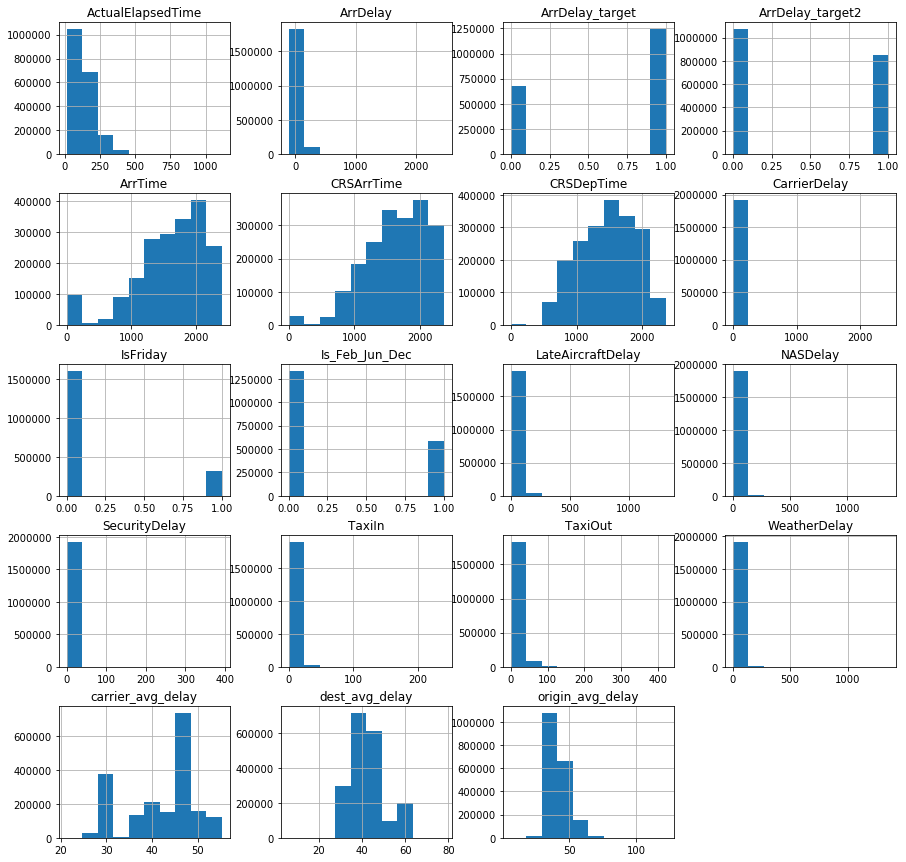

In [6]:
df.hist(figsize=(15,15))
plt.show()

In [36]:
### Based on distibution we see that there is:
### 1. different range of features
### 2. outliers for example carrier_avg_delay, CRSArrTime...

### Since there are outliers we will standardize the data between -1 and 1

## Linear Regression

In [37]:
### Train_test_split

In [6]:
x = df.drop(['ArrDelay', 'ArrDelay_target','ArrDelay_target2'], axis=1)

y = df['ArrDelay']

In [7]:
x.head()

,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsFriday,Is_Feb_Jun_Dec,carrier_avg_delay,origin_avg_delay,dest_avg_delay
0,1955,2211.0,2225,128.0,4.0,8.0,19.179399,3.703571,15.021635,0.090137,25.296466,0.0,0,30.087884,53.531579,35.925260
1,735,1002.0,1000,128.0,5.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0.0,0,30.087884,53.531579,35.925260
2,620,804.0,750,96.0,3.0,17.0,19.179399,3.703571,15.021635,0.090137,25.296466,0.0,0,30.087884,45.835815,35.889979
3,1755,1959.0,1925,90.0,3.0,10.0,2.000000,0.000000,0.000000,0.000000,32.000000,0.0,0,30.087884,45.835815,35.889979
4,1915,2121.0,2110,101.0,4.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0.0,0,30.087884,45.835815,39.358735


In [8]:
y

0         -14.0
1           2.0
2          14.0
3          34.0
4          11.0
           ... 
1928363    25.0
1928364    75.0
1928365    99.0
1928366     9.0
1928367    -5.0
Name: ArrDelay, Length: 1928368, dtype: float64

In [9]:
### train validation and test set

In [10]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7)
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, train_size=0.8, random_state=7)

In [11]:
### StandardScaler

scaler1=preprocessing.StandardScaler()

scaler1.fit(x_train)

StandardScaler()

In [12]:
x_train=scaler1.transform(x_train)
x_validation = scaler1.transform(x_validation)
x_train_validation = scaler1.transform(x_train_validation)
x_test=scaler1.transform(x_test)

In [13]:
model = linear_model.Lasso()

In [14]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 100]}

In [15]:
grid = model_selection.GridSearchCV(model, param_grid=params, cv=10, scoring='r2', return_train_score=True)

In [16]:
grid.fit(x_train_validation, y_train_validation)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 100]},
             return_train_score=True, scoring='r2')

In [17]:
### sklearn.metrics.SCORERS.keys()

In [18]:
grid.best_params_

{'alpha': 0.0001}

In [19]:
grid.best_score_

0.7677827930215176

In [20]:
linear_model1 = linear_model.Lasso(alpha=0.0001)

In [21]:
linear_model1.fit(x_train_validation, y_train_validation)

Lasso(alpha=0.0001)

In [22]:
y_test_pred = linear_model1.predict(x_test)
y_train_val_pred = linear_model1.predict(x_train_validation)

In [23]:
metrics.r2_score(y_test, y_test_pred)

0.7638882287803402

In [24]:
metrics.r2_score(y_train_validation, y_train_val_pred)

0.7678090975783471

In [25]:
MSE = metrics.mean_squared_error(y_test, y_test_pred)
MSE

752.6718659692038

In [26]:
MSE = metrics.mean_squared_error(y_train_validation, y_train_val_pred)
MSE

752.8896174816861

In [27]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
MAPE

2355219173710377.0

In [28]:
### MinMaxScaler

scaler2=preprocessing.MinMaxScaler()

In [29]:
scaler2.fit(x_train)

MinMaxScaler()

In [30]:
x_train=scaler2.transform(x_train)
x_validation = scaler2.transform(x_validation)
x_train_validation = scaler2.transform(x_train_validation)
x_test=scaler2.transform(x_test)

In [31]:
model = linear_model.Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 100]}
grid = model_selection.GridSearchCV(model, param_grid=params, cv=10, scoring='r2', return_train_score=True)

grid.fit(x_train_validation, y_train_validation)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 100]},
             return_train_score=True, scoring='r2')

In [32]:
grid.best_params_

{'alpha': 0.0001}

In [33]:
grid.best_score_

0.7677825424305826

In [34]:
linear_model2 = linear_model.Lasso(alpha=0.0001)
linear_model2.fit(x_train_validation, y_train_validation)

Lasso(alpha=0.0001)

In [35]:
#### coefficients and intercept of final model
linear_model2.intercept_

-48.199456005289576

In [37]:
linear_model2.coef_

array([ 1.03559843e+01, -2.77045178e+00,  2.13994965e+00, -2.03882360e+01,
        1.74571385e+02,  2.21721112e+02,  2.41496754e+03,  1.28164955e+03,
        1.14641273e+03,  3.95132872e+02,  1.29644016e+03,  1.31493647e+00,
        3.29256923e+00,  6.86457746e+00,  1.13431429e+01,  6.01499299e+00])

In [ ]:
y_test_pred2 = linear_model2.predict(x_test)
y_train_val_pred2 = linear_model2.predict(x_train_validation)

In [ ]:
metrics.r2_score(y_test, y_test_pred2)

In [ ]:
metrics.r2_score(y_train_validation, y_train_val_pred2)

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_test_pred2)
MSE

In [ ]:
MSE = metrics.mean_squared_error(y_train_validation, y_train_val_pred2)
MSE

## SVM

In [ ]:
from sklearn.svm import LinearSVR

In [5]:
x = df.drop(['ArrDelay', 'ArrDelay_target','ArrDelay_target2'], axis=1)

y = df['ArrDelay']

x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7)
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, train_size=0.8, random_state=7)

In [8]:
### StandardScaler

scaler=preprocessing.StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_validation = scaler.transform(x_validation)
x_train_validation = scaler.transform(x_train_validation)
x_test=scaler.transform(x_test)

In [13]:
model=LinearSVR(C=0.01, max_iter=10000)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# time complexity is more than quadratic on number of instances so it is suggested to use LinearSVR

In [14]:
model.fit(x_train, y_train)

LinearSVR(C=0.01, max_iter=10000)

In [24]:
### first list of parameters was
###Cs = [0.001,0.005, 0.01, 0.05, 0.1, 1, 10, 100]            
### best_score was 0.604 and best_params is C=0.001. Since results are not too good we will try to give
###different set of parameters C, Cs = [0.0001,0.0005, 0.001, 0.00001,0.0002]
### gave best_score 0.71 for C=0.0005 so we decided to try with values of parameter C between 0.0002 and 0.001


Cs = [0.00025, 0.0004, 0.0005, 0.0006, 0.0007, 0.0009]            

best_score = 0
best_params = {'C' : 0} 

for C in Cs:
        model = LinearSVR(C=C, verbose=1,max_iter=10000)
        scores=model_selection.cross_val_score(model, x_train_validation, y_train_validation, cv=5, scoring='r2')
        score=scores.mean()
        if score > best_score:
            best_score = score
            best_params['C'] = C
            
### With last set of parameters, best_params was again 0.0005 and best_score was not better. 

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [31]:
print('best_score:', best_score)
print('\n')
print('best_params:', best_params)

best_score: 0.7119741830945807


best_params: {'C': 0.0005}


In [29]:
final_svr=LinearSVR(C=best_params['C'], max_iter=10000, verbose=1)

In [30]:
final_svr.fit(x_train_validation, y_train_validation)

[LibLinear]

LinearSVR(C=0.0005, max_iter=10000, verbose=1)

In [34]:
y_test_predicted=final_svr.predict(x_test)
y_train_val_predicted=final_svr.predict(x_train_validation)

In [35]:
print('r2_score on test set:', metrics.r2_score(y_test, y_test_predicted))
print('\n')
print('r2_score on train-validation set:', metrics.r2_score(y_train_validation, y_train_val_predicted))

r2_score on test set: 0.6778374984632073


r2_score on train-validation set: 0.6831029781975939


## RandomForest

In [20]:
from sklearn import ensemble

In [21]:
x = df.drop(['ArrDelay', 'ArrDelay_target','ArrDelay_target2'], axis=1)

y = df['ArrDelay']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7)

In [22]:
### StandardScaler

scaler=preprocessing.StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
n_est=[10, 50]#, 20, 30,50,60,100]
max_depth=[3, 6]#,4,5,6]

In [44]:
best_score=0
best_params = {'n_estimators' : 0, 'max_depth' : 0}

for n in n_est:
    for d in max_depth:
        model =  ensemble.RandomForestRegressor(n_estimators=n, max_depth=d)
        scores = model_selection.cross_val_score(model, x_train, y_train, cv=5, scoring='r2')        
        score = scores.mean()
        
        if score > best_score:
            best_score = score
            best_params['n_estimators'] = n
            best_params['max_depth'] = d

KeyboardInterrupt: 

## BaggingRegressor

In [25]:
from sklearn import tree

In [33]:
base_model = tree.DecisionTreeRegressor(max_depth=5, random_state=7)

In [34]:
model = ensemble.BaggingRegressor(base_model, n_estimators=500, max_samples=100, bootstrap=True, random_state=7)

In [40]:
model.fit(x_train, y_train.values)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      random_state=7),
                 max_samples=100, n_estimators=500, random_state=7)

In [43]:
y_test_predicted = model.predict(x_test)
y_train_predicted = model.predict(x_train)

In [32]:
print('r2_score on test set:', metrics.r2_score(y_test, y_test_predicted))
print('\n')
print('r2_score on train-validation set:', metrics.r2_score(y_train, y_train_predicted))

r2_score on test set: 0.6345990546608209


r2_score on train-validation set: 0.629251832421841


## Neural networks

In [2]:
#pip install tensorflow

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

from tensorflow.keras import utils

In [8]:
x = df.drop(['ArrDelay', 'ArrDelay_target','ArrDelay_target2'], axis=1)

y = df['ArrDelay']

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7)

In [11]:
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [12]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
number_of_features = x_train.shape[1]
output_size = 1

In [14]:
model = Sequential([Input(shape=(number_of_features, )),
                    Dense(units=100, activation='relu'),
                    Dense(units=output_size)
                   ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


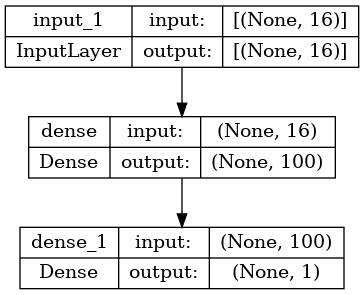

In [19]:
utils.plot_model(model, to_file='models/flight_delay_nn.png', show_shapes=True)

In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [27]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

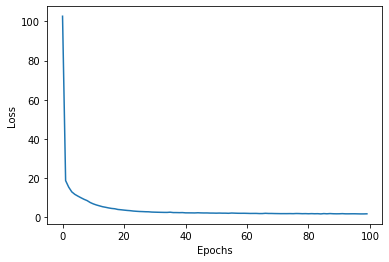

In [28]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [29]:
train_scores = model.evaluate(x_train, y_train, batch_size=32)

40376/40376 [==============================] - 45s 1ms/step - loss: 1.5853 - mae: 0.4331


In [30]:
train_scores

[1.5853122472763062, 0.4331341087818146]

In [31]:
test_scores = model.evaluate(x_test, y_test, batch_size=32)

19887/19887 [==============================] - 22s 1ms/step - loss: 1.6728 - mae: 0.4337


In [32]:
test_scores

[1.6727731227874756, 0.43373677134513855]

In [33]:
y_test_predicted = model.predict(x_test)

metrics.r2_score(y_test, y_test_predicted)

19887/19887 [==============================] - 16s 808us/step


0.9994752533645279

## XGBoostRegressor

In [44]:
import xgboost

In [45]:
x = df.drop(['ArrDelay', 'ArrDelay_target','ArrDelay_target2'], axis=1)

y = df['ArrDelay']

In [46]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7)

In [47]:
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [48]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [50]:
n_est=[10, 20, 30,50,60,100]
max_depth=[3,4,5,6]

In [51]:
best_score=0
best_params = {'n_estimators' : 0, 'max_depth' : 0}

for n in n_est:
    for d in max_depth:
        model =  xgboost.XGBRegressor(n_estimators=n, max_depth=d, objective='reg:squarederror')
        scores = model_selection.cross_val_score(model, x_train, y_train, cv=5, scoring='r2')        
        score = scores.mean()
        
        if score > best_score:
            best_score = score
            best_params['n_estimators'] = n
            best_params['max_depth'] = d

In [52]:
print('best_score:', best_score)
print('\n')
print('best_params:', best_params)

best_score: 0.9946368183485145


best_params: {'n_estimators': 100, 'max_depth': 6}


In [55]:
model_xgboost = xgboost.XGBRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], objective='reg:squarederror')

In [56]:
model_xgboost.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
y_test_predicted = model_xgboost.predict(x_test)
y_train_predicted = model_xgboost.predict(x_train)

In [59]:
print('r2_score on test set:', metrics.r2_score(y_test, y_test_predicted))
print('\n')
print('r2_score on train set:', metrics.r2_score(y_train, y_train_predicted))

r2_score on test set: 0.9949351008236421


r2_score on train set: 0.9958792735711115


In [64]:
features = x.columns

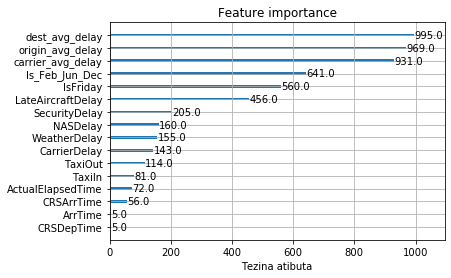

In [65]:
xgboost.plot_importance(model_xgboost)
plt.yticks(range(len(features)), features)
plt.xlabel('Tezina atibuta')
plt.ylabel('')
plt.show()

In [67]:
model_xgboost.feature_importances_

array([1.8506279e-04, 1.3982366e-03, 1.4072113e-03, 1.3463490e-03,
       4.5306774e-04, 1.6497965e-03, 1.9957383e-01, 6.9072045e-02,
       1.1506827e-01, 4.3337336e-01, 1.7453896e-01, 6.5837063e-05,
       1.2293491e-04, 6.0093380e-04, 6.1283680e-04, 5.3128006e-04],
      dtype=float32)

In [70]:
features_importances=pd.Series(model_xgboost.feature_importances_, index=features)
features_importances

CRSDepTime           0.000185
ArrTime              0.001398
CRSArrTime           0.001407
ActualElapsedTime    0.001346
TaxiIn               0.000453
TaxiOut              0.001650
CarrierDelay         0.199574
WeatherDelay         0.069072
NASDelay             0.115068
SecurityDelay        0.433373
LateAircraftDelay    0.174539
IsFriday             0.000066
Is_Feb_Jun_Dec       0.000123
carrier_avg_delay    0.000601
origin_avg_delay     0.000613
dest_avg_delay       0.000531
dtype: float32

# Classification examples 

## SVM  classification

In [8]:
from sklearn.svm import LinearSVC

In [43]:
x = df.drop(['ArrDelay', 'ArrDelay_target','ArrDelay_target2'], axis=1)

y = df['ArrDelay_target2']  ## classification target variable

In [ ]:
model = LinearSVC(C=C, verbose=1,max_iter=1000)

In [10]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x, y, test_size=0.33, stratify=y, random_state=7)
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, train_size=0.8, stratify=y_train_validation, random_state=7)

In [11]:
### StandardScaler

scaler=preprocessing.StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [9]:
x_train=scaler.transform(x_train)
x_validation = scaler.transform(x_validation)
x_train_validation = scaler.transform(x_train_validation)
x_test=scaler.transform(x_test)

In [13]:
#np.shape(x_train)
x_train.shape

(1033604, 16)

In [14]:
df['ArrDelay_target2'].value_counts()

0    1077345
1     851023
Name: ArrDelay_target2, dtype: int64

In [15]:
#Cs = [0.001,0.005, 0.01, 0.05, 0.1, 1, 10, 100] #, 10]   #np.array([10**i for i in range(-3, 3)])
# Training complexity of nonlinear SVM is n^2 * num_of_features, with n the amount of training instances
# So, this way of selection of the model lasts too long

# Linear SVM
# We tried with max_iter 100 and List of param  C = [0.001,0.005, 0.01, 0.05, 0.1, 1, 10, 100]
# best_score: 0.7355515824180927 , best_params: {'C': 1}
# Then we managed list of param C according previous results
# New list C = [0.1, 0.5, 0.75, 1, 1.5, 2.5, 5, 10], max_iter = 500
# Result is:   best_score: 0.735605761565313 , best_params: {'C': 10}

## New list C = [ 1, 5, 10, 15, 20], max_iter = 1000
## Result is: best_score: 0.7358998769359371, best_params: {'C': 10}
## Conclusion is that all models are similar, but we will choose the third model as the best
## Linear SVM model obviously has no power to learn better

Cs = [ 1, 5, 10, 15, 20]       
#gammas = [0.001] #, 0.01]  #np.array([10**i for i in range(-2, 2)])


best_score = 0
best_params = {'C' : 0}  #, 'gamma' : 0}
all_scores = []

for C in Cs:
    for gamma in gammas:
        model = LinearSVC(C=C, verbose=1,max_iter=1000)
        model.fit(x_train, y_train)
        
        score = model.score(x_validation, y_validation)
        all_scores.append({"C" : C, "score":score})
        if score > best_score:
            best_score = score
            best_params['C'] = C
            #best_params['gamma'] = gamma

[LibLinear]

/home/kaca/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[LibLinear]

/home/kaca/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[LibLinear]

/home/kaca/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[LibLinear]

/home/kaca/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[LibLinear]

/home/kaca/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
all_scores

[{'C': 1, 'score': 0.7346731062453077},
 {'C': 5, 'score': 0.7346227970371746},
 {'C': 10, 'score': 0.7358998769359371},
 {'C': 15, 'score': 0.7300214394625428},
 {'C': 20, 'score': 0.7302265462341623}]

In [17]:
print('best_score:', best_score)
print('\n')
print('best_params:', best_params)

best_score: 0.7358998769359371


best_params: {'C': 10}


In [ ]:
model.score()  # Return the mean accuracy on the given test data and labels.

In [ ]:
### This way of selection of the model lasts too long --> model = SVC()

In [24]:
# model = SVC(C=0.1, gamma=0.001)
# model.fit(x_train_validation, y_train_validation)
# score = model.score(x_test, y_test) 

In [18]:
model = LinearSVC(C=best_params['C'])

In [19]:
model.fit(x_train_validation, y_train_validation)

/home/kaca/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10)

In [25]:
model.score(x_test, y_test)

0.735405319613679

In [28]:
y_test_pred = model.predict(x_test)

In [29]:
print('Test skup: \n')
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print("Matrica konfuzije", pd.DataFrame(cnf_matrix, index=model.classes_, columns=model.classes_), sep="\n")
print("\n")

accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Preciznost", accuracy)
print("\n")

class_report = metrics.classification_report(y_test, y_test_pred)
print("Izvestaj klasifikacije", class_report, sep="\n")

Test skup: 

Matrica konfuzije
        0       1
0  316723   38801
1  129577  151261


Preciznost 0.735405319613679


Izvestaj klasifikacije
              precision    recall  f1-score   support

           0       0.71      0.89      0.79    355524
           1       0.80      0.54      0.64    280838

    accuracy                           0.74    636362
   macro avg       0.75      0.71      0.72    636362
weighted avg       0.75      0.74      0.72    636362



## XGBoost

In [38]:
#pip install xgboost

In [39]:
import xgboost

In [44]:
model_xgboost = xgboost.XGBClassifier(n_estimators=100, max_depth=3, objective='reg:squarederror')

In [45]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33,stratify=y, random_state=7)


In [46]:
model_xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [47]:
y_test_predicted = model_xgboost.predict(x_test)
y_train_predicted = model_xgboost.predict(x_train)

In [48]:
model_xgboost.score(x_test, y_test_predicted)

1.0

In [49]:
model_xgboost.score(x_train, y_train_predicted)

1.0

In [50]:
print('Trening skup: \n')
cnf_matrix = metrics.confusion_matrix(y_train, y_train_predicted)
print("Matrica konfuzije", pd.DataFrame(cnf_matrix, index=model_xgboost.classes_, columns=model_xgboost.classes_), sep="\n")
print("\n")

accuracy = metrics.accuracy_score(y_train, y_train_predicted)
print("Preciznost", accuracy)
print("\n")

class_report = metrics.classification_report(y_train, y_train_predicted)
print("Izvestaj klasifikacije", class_report, sep="\n")
print('-----------------------------------------------------\n')

print('Test skup: \n')
cnf_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
print("Matrica konfuzije", pd.DataFrame(cnf_matrix, index=model_xgboost.classes_, columns=model_xgboost.classes_), sep="\n")
print("\n")

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print("Preciznost", accuracy)
print("\n")

class_report = metrics.classification_report(y_test, y_test_predicted)
print("Izvestaj klasifikacije", class_report, sep="\n")

Trening skup: 

Matrica konfuzije
        0       1
0  721773      48
1   18874  551311


Preciznost 0.9853545571769791


Izvestaj klasifikacije
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    721821
           1       1.00      0.97      0.98    570185

    accuracy                           0.99   1292006
   macro avg       0.99      0.98      0.99   1292006
weighted avg       0.99      0.99      0.99   1292006

-----------------------------------------------------

Test skup: 

Matrica konfuzije
        0       1
0  355510      14
1    9365  271473


Preciznost 0.9852615335296576


Izvestaj klasifikacije
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    355524
           1       1.00      0.97      0.98    280838

    accuracy                           0.99    636362
   macro avg       0.99      0.98      0.98    636362
weighted avg       0.99      0.99      0.99    636362



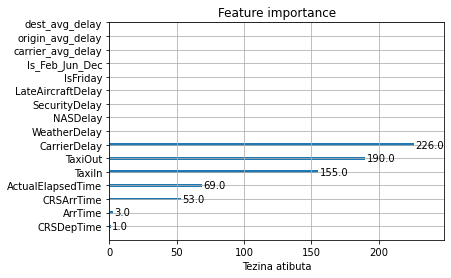

In [51]:
xgboost.plot_importance(model_xgboost)
plt.yticks(range(len(model_xgboost.feature_names_in_)), model_xgboost.feature_names_in_)
plt.xlabel('Tezina atibuta')
plt.ylabel('')
plt.show()

In [52]:
x.columns

Index(['CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'IsFriday', 'Is_Feb_Jun_Dec', 'carrier_avg_delay',
       'origin_avg_delay', 'dest_avg_delay'],
      dtype='object')

In [53]:
features_importances=pd.Series(model_xgboost.feature_importances_, index=model_xgboost.feature_names_in_)
features_importances

CRSDepTime           0.000000
ArrTime              0.000000
CRSArrTime           0.000000
ActualElapsedTime    0.000000
TaxiIn               0.000008
TaxiOut              0.003953
CarrierDelay         0.105213
WeatherDelay         0.045854
NASDelay             0.063537
SecurityDelay        0.688571
LateAircraftDelay    0.092864
IsFriday             0.000000
Is_Feb_Jun_Dec       0.000000
carrier_avg_delay    0.000000
origin_avg_delay     0.000000
dest_avg_delay       0.000000
dtype: float32

In [54]:
### Cross validation score

In [55]:
n_est=[10, 20, 30,50,60,100]
max_depth=[3,4,5,6]

In [56]:
best_score=0
best_params = {'n_estimators' : 0, 'max_depth' : 0}

for n in n_est:
    for d in max_depth:
        model =  xgboost.XGBClassifier(n_estimators=n, max_depth=d, objective='reg:squarederror')
        scores = model_selection.cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')        
        score = scores.mean()
        
        if score > best_score:
            best_score = score
            best_params['n_estimators'] = n
            best_params['max_depth'] = d

KeyboardInterrupt: 

In [ ]:
print('best_score:', best_score)
print('\n')
print('best_params:', best_params)

In [ ]:
final_model = xgboost.XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], objective='reg:squarederror')

In [ ]:
y_test_predicted = final_model.predict(x_test)
y_train_predicted = final_model.predict(x_train)

In [ ]:
print('Trening skup: \n')
cnf_matrix = metrics.confusion_matrix(y_train, y_train_predicted)
print("Matrica konfuzije", pd.DataFrame(cnf_matrix, index=final_model.classes_, columns=final_model.classes_), sep="\n")
print("\n")

accuracy = metrics.accuracy_score(y_train, y_train_predicted)
print("Preciznost", accuracy)
print("\n")

class_report = metrics.classification_report(y_train, y_train_predicted)
print("Izvestaj klasifikacije", class_report, sep="\n")
print('-----------------------------------------------------\n')

print('Test skup: \n')
cnf_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
print("Matrica konfuzije", pd.DataFrame(cnf_matrix, index=final_model.classes_, columns=final_model.classes_), sep="\n")
print("\n")

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print("Preciznost", accuracy)
print("\n")

class_report = metrics.classification_report(y_test, y_test_predicted)
print("Izvestaj klasifikacije", class_report, sep="\n")